# **Clustering using Mahout**

## Enable Hadoop and Mahout in Jupyter Notebook  

In [1]:
# set hadoop environment variable
import os, sys

os.environ["HADOOP_VERSION"] = "3.3.0"
os.environ["HADOOP_TOOLS"] = "/opt/hadoop/current/share/hadoop/tools/lib"
os.environ["JAVA_HOME"] = "/usr/lib/jvm/default-java"

# replace <Your User Name> with your own user name
os.environ["USER"] = <Your User Name>

# here we assume that our workspace is a folder called hadoop
os.environ["WORKSPACE"] = "/home/" + os.getenv("USER") + "/hadoop"

# append hadoop executable paths to the existing system path
%set_env PATH=/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/opt/jupyterhub/bin:/opt/hadoop/current/bin:/opt/spark/current/bin:/opt/hadoop/current/bin:/opt/mahout/current/bin

env: PATH=/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/opt/jupyterhub/bin:/opt/hadoop/current/bin:/opt/spark/current/bin:/opt/hadoop/current/bin:/opt/mahout/current/bin


Optional: We will have to export the PATHs below in order to re-run in terminal with exact commands as in our Jupyer notebook.

```shell
export HADOOP_VERSION="3.3.0"
export HADOOP_TOOLS="/opt/hadoop/current/share/hadoop/tools/lib"
export WORKSPACE="/home/<Your User Name>/hadoop"
```

## Clustering Intro

Clustering is the procedure to organize elements or items of a given collection into groups based on the similarity between the items. For example, the applications related to online news publishing group their news articles using clustering.

Using **Mahout**, we can cluster a given set of data. The steps required are as follows:

- **Algorithm**: You need to select a suitable clustering algorithm to group the elements of a cluster.
- **Similarity**: and Dissimilarity You need to have a rule in place to verify the similarity between the newly encountered elements and the elements in the groups.
- **Stopping**: Condition A stopping condition is required to define the point where no clustering is required.

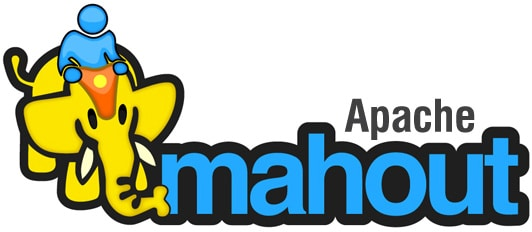

## Procedure of Clustering
To cluster the given data you need to -

* Create required directories for storing files in Hadoop File System. (Create directories for input file, sequence file, and clustered output in case of canopy).
* Copy the input file to the Hadoop File system from Unix file system.
* Prepare the sequence file from the input data.
* Run any of the available clustering algorithms.
* Get the clustered data.

## Preparing Input File Directories

Create directories in the Hadoop file system to store the input file, sequence files, and clustered data using the following command:

```shell
hadoop fs -mkdir -p mahout
```

In [2]:
%%sh
hadoop fs -rm -r mahout

Deleted mahout


In [3]:
%%sh
# Insert Your Code Here
hadoop fs -mkdir -p mahout

In [4]:
%%sh
# Insert Your Code Here
hadoop fs -ls 

Found 9 items
drwxr-xr-x   - tsree001 users          0 2022-03-07 09:11 .sparkStaging
drwxr-xr-x   - tsree001 users          0 2022-02-20 14:34 CitiBikeSystemDataset
drwxr-xr-x   - tsree001 users          0 2022-03-05 08:20 cache_pretrained
-rw-r--r--   3 tsree001 users  109503486 2022-02-20 08:18 global_food_prices_data.csv
drwxr-xr-x   - tsree001 users          0 2023-05-18 07:04 lab3
drwxr-xr-x   - tsree001 users          0 2023-06-03 02:56 lab4
drwxr-xr-x   - tsree001 users          0 2023-07-01 06:46 mahout
drwxr-xr-x   - tsree001 users          0 2023-07-01 05:52 tmp
-rw-r--r--   3 tsree001 users     124103 2022-03-06 07:39 wdbc.data


## Copying Input File to HDFS

Create a working directory, called <code>mahout</code> and its sub-directory <code>docs</code> for documents to clustered.

In [5]:
%%sh
# remove the folder if already exists
rm -rf ./mahout 

# create an empty folder for our clustering work
mkdir -p ./mahout 

# create a subfolder to store our document file
mkdir -p ./mahout/docs

# create a subfolder to store our cluster output files
mkdir -p ./mahout/output

In this lab, we shall use *20 News Groups data*. It is a dataset as part of <code>scikit-learn</code>.

* https://scikit-learn.org/stable/datasets/real_world.html

In [6]:
import os
from random import sample
from sklearn.datasets import fetch_20newsgroups

# download a dataset containing 15k+ documents from 20 news agencies  
data = fetch_20newsgroups(subset="all", shuffle=True, random_state=42)

# extract each document and save it as a txt file into the 'docs' folder 
for fpath, text in zip(data['filenames'], data['data']) :
    # extract the filename from the full file path
    filename = fpath.split('/')[-1]
    
    # write text into a file and save it to the 'docs' folder 
    with open('./mahout/docs/' + filename + '.txt', 'w') as f :
        try :
            f.write( text )
        except :
            pass

Confirm if the files are created in the <code>./mahout/docs</code> folder.

In [7]:
%%sh
# Insert Your Code Here
ls ./mahout/docs

10000.txt
10001.txt
10002.txt
10003.txt
10004.txt
10005.txt
10006.txt
10007.txt
10008.txt
10009.txt
10010.txt
10011.txt
10012.txt
10013.txt
10014.txt
10015.txt
10016.txt
10017.txt
10018.txt
10019.txt
10021.txt
10022.txt
10023.txt
10024.txt
10025.txt
10026.txt
10027.txt
10028.txt
10029.txt
10030.txt
10031.txt
10032.txt
10033.txt
10034.txt
10035.txt
10036.txt
10037.txt
10038.txt
10039.txt
10040.txt
10041.txt
10042.txt
10043.txt
10044.txt
10045.txt
10046.txt
10047.txt
10048.txt
10049.txt
10050.txt
10051.txt
100521.txt
10052.txt
10053.txt
10054.txt
10055.txt
10056.txt
10057.txt
10058.txt
10059.txt
10060.txt
10061.txt
10062.txt
10063.txt
10064.txt
10065.txt
10066.txt
10067.txt
10068.txt
10069.txt
10070.txt
10071.txt
10072.txt
10073.txt
10074.txt
10075.txt
10076.txt
10078.txt
10079.txt
10080.txt
10081.txt
10082.txt
10083.txt
10084.txt
10085.txt
10086.txt
10087.txt
10088.txt
10089.txt
10090.txt
10091.txt
10092.txt
10093.txt
10094.txt
10095.txt
10096.txt
10097.txt
10098.txt
10099.txt
10100.txt

Now, copy the input data file from the Linux file system to mahout_data directory in the Hadoop File System as shown below. Assume your input file is mydata.txt and it is in the /home/Hadoop/data/ directory.

```shell
hadoop fs -copyFromLocal ./mahout/docs mahout/.
```

Confirm if the documents are correct copied to the HDFS data folder.

In [8]:
%%sh
# Insert Your Code Here
hadoop fs -copyFromLocal ./mahout/docs mahout/.

In [9]:
%%sh
# Insert Your Code Here
hadoop fs -ls mahout

Found 1 items
drwxr-xr-x   - tsree001 users          0 2023-07-01 06:49 mahout/docs


## Preparing the Sequence File

Mahout provides you a utility to convert the given input file in to a sequence file format. This utility requires two parameters.

* The input file directory where the original data resides.
* The output file directory where the clustered data is to be stored.

Given below is the help prompt of mahout **seqdirectory** utility.

You can get help of the utility as shown below:

```shell
mahout seqdirectory --help
```

In [10]:
%%sh
# Insert Your Code Here
mahout seqdirectory --help

Running on hadoop, using /opt/hadoop/current/bin/hadoop and HADOOP_CONF_DIR=
MAHOUT-JOB: /opt/mahout/current/mahout-examples-0.13.0-job.jar
Usage:                                                                          
 [--input <input> --output <output> --overwrite --method <method> --chunkSize   
<chunkSize> --fileFilterClass <fileFilterClass> --keyPrefix <keyPrefix>         
--charset <charset> --method <method> --overwrite --help --tempDir <tempDir>    
--startPhase <startPhase> --endPhase <endPhase>]                                
Job-Specific Options:                                                           
  --input (-i) input                             Path to job input directory.   
  --output (-o) output                           The directory pathname for     
                                                 output.                        
  --overwrite (-ow)                              If present, overwrite the      
                                                 o

23/07/01 06:49:47 INFO MahoutDriver: Program took 39 ms (Minutes: 6.5E-4)


Generate the sequence file using the utility using the following syntax:

```shell
mahout seqdirectory -i <input file path> -o <output directory>
```

In our case, that will be: 
```shell
# create squence files to be used for k-Means clustering and creation of TF-IDF vectors
mahout seqdirectory -i mahout/docs -ow -o mahout/docs-seqfiles -c UTF-8 -chunk 5
```

Confirm if the sequence files are created in <code>docs-seqfiles</code>.

In [11]:
%%sh
# create squence files to be used for k-Means clustering and creation of TF-IDF vectors
# Insert Your Code Here
mahout seqdirectory -i mahout/docs -ow -o mahout/docs-seqfiles -c UTF-8 -chunk 5

Running on hadoop, using /opt/hadoop/current/bin/hadoop and HADOOP_CONF_DIR=
MAHOUT-JOB: /opt/mahout/current/mahout-examples-0.13.0-job.jar


23/07/01 06:49:51 INFO AbstractJob: Command line arguments: {--charset=[UTF-8], --chunkSize=[5], --endPhase=[2147483647], --fileFilterClass=[org.apache.mahout.text.PrefixAdditionFilter], --input=[mahout/docs], --keyPrefix=[], --method=[mapreduce], --output=[mahout/docs-seqfiles], --overwrite=null, --startPhase=[0], --tempDir=[temp]}
23/07/01 06:49:52 INFO deprecation: mapred.input.dir is deprecated. Instead, use mapreduce.input.fileinputformat.inputdir
23/07/01 06:49:52 INFO deprecation: mapred.compress.map.output is deprecated. Instead, use mapreduce.map.output.compress
23/07/01 06:49:52 INFO deprecation: mapred.output.dir is deprecated. Instead, use mapreduce.output.fileoutputformat.outputdir
23/07/01 06:49:52 INFO DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at lena-master/128.86.245.64:8032
23/07/01 06:49:52 INFO JobResourceUploader: Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/tsree001/.staging/job_1687601879897_6311
23/07/01 06:49:54 INFO FileI

In [12]:
%%sh
# Insert Your Code Here
hadoop fs -ls mahout/docs-seqfiles

Found 7 items
-rw-r--r--   3 tsree001 users          0 2023-07-01 06:50 mahout/docs-seqfiles/_SUCCESS
-rw-r--r--   3 tsree001 users    2782063 2023-07-01 06:50 mahout/docs-seqfiles/part-m-00000
-rw-r--r--   3 tsree001 users    2672813 2023-07-01 06:50 mahout/docs-seqfiles/part-m-00001
-rw-r--r--   3 tsree001 users    2677021 2023-07-01 06:50 mahout/docs-seqfiles/part-m-00002
-rw-r--r--   3 tsree001 users    2773127 2023-07-01 06:50 mahout/docs-seqfiles/part-m-00003
-rw-r--r--   3 tsree001 users    2925009 2023-07-01 06:50 mahout/docs-seqfiles/part-m-00004
-rw-r--r--   3 tsree001 users    1914149 2023-07-01 06:50 mahout/docs-seqfiles/part-m-00005


## Clustering Algorithms
Mahout supports two main algorithms for clustering namely:

* K-means Clustering
* Canopy Clustering


### K-means Clustering

K-means clustering is an important clustering algorithm. The k in k-means clustering algorithm represents the number of clusters the data is to be divided into. For example, the k value specified to this algorithm is selected as 3, the algorithm is going to divide the data into 3 clusters.

Each object will be represented as vector in space. Initially k points will be chosen by the algorithm randomly and treated as centers, every object closest to each center are clustered. There are several algorithms for the distance measure and the user should choose the required one.

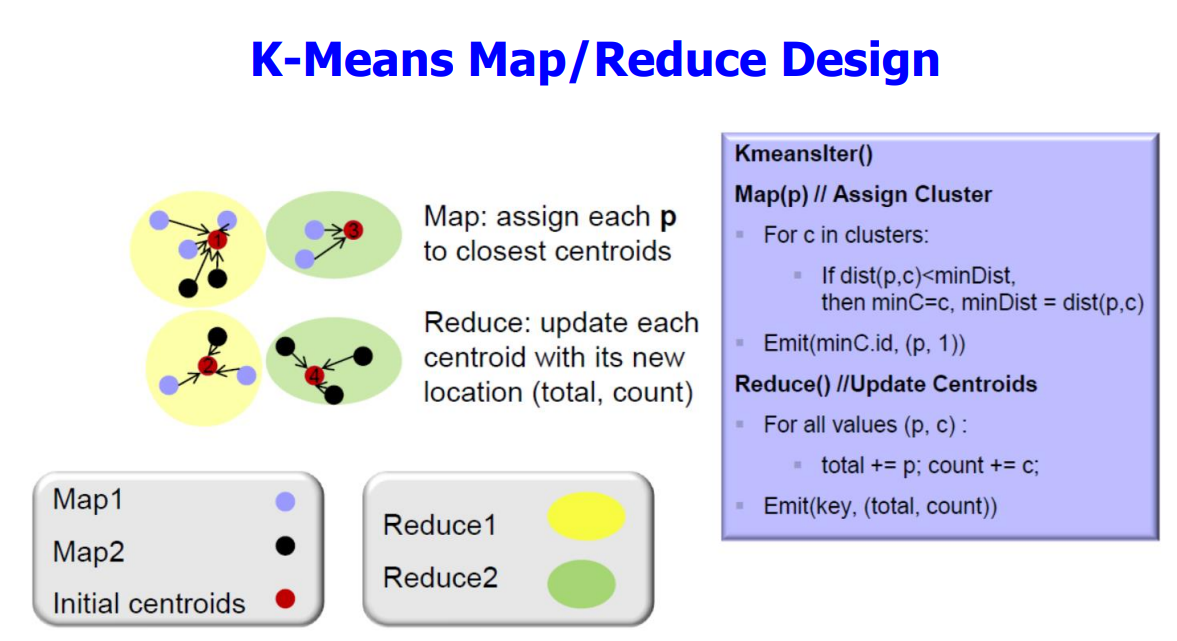

### Creating Vector Files

Unlike Canopy algorithm, the k-means algorithm requires vector files as input, therefore you have to create vector files.

To generate vector files from sequence file format, Mahout provides the seq2parse utility.

Given below are some of the options of **seq2parse** utility. Create vector files using these options.

```shell
mahout seq2sparse
--analyzerName (-a) analyzerName  The class name of the analyzer
--chunkSize (-chunk) chunkSize    The chunkSize in MegaBytes.
--output (-o) output              The directory pathname for o/p
--input (-i) input                Path to job input directory.
```

You can also get help of the utility as shown below:
```shell
mahout seq2sparse --help
```

In our case, we can create TF-IDF vectors for the documents using the command below:

```shell
# create TF-IDF vectors for the documents in our corpus, i.e. 15k+ documents
mahout seq2sparse -nv -i mahout/docs-seqfiles -n 2 -o mahout/docs-vectors
```

Confirm if TF-IDF vectors are created in the <code>docs-vectors</code>.

In [13]:
%%sh
# Insert Your Code Here
mahout seq2sparse --help

Running on hadoop, using /opt/hadoop/current/bin/hadoop and HADOOP_CONF_DIR=
MAHOUT-JOB: /opt/mahout/current/mahout-examples-0.13.0-job.jar
Usage:                                                                          
 [--minSupport <minSupport> --analyzerName <analyzerName> --chunkSize           
<chunkSize> --output <output> --input <input> --minDF <minDF> --maxDFSigma      
<maxDFSigma> --maxDFPercent <maxDFPercent> --weight <weight> --norm <norm>      
--minLLR <minLLR> --numReducers <numReducers> --maxNGramSize <ngramSize>        
--overwrite --help --sequentialAccessVector --namedVector --logNormalize]       
Options                                                                         
  --minSupport (-s) minSupport        (Optional) Minimum Support. Default       
                                      Value: 2                                  
  --analyzerName (-a) analyzerName    The class name of the analyzer            
  --chunkSize (-chunk) chunkSize      The chunkSiz

23/07/01 06:50:21 INFO MahoutDriver: Program took 30 ms (Minutes: 5.0E-4)


In [14]:
%%sh
# create TF-IDF vectors for the documents in our corpus, i.e. 15k+ documents
# Insert Your Code Here
mahout seq2sparse -nv -i mahout/docs-seqfiles -n 2 -o mahout/docs-vectors

Running on hadoop, using /opt/hadoop/current/bin/hadoop and HADOOP_CONF_DIR=
MAHOUT-JOB: /opt/mahout/current/mahout-examples-0.13.0-job.jar


23/07/01 06:50:25 INFO SparseVectorsFromSequenceFiles: Maximum n-gram size is: 1
23/07/01 06:50:25 INFO SparseVectorsFromSequenceFiles: Minimum LLR value: 1.0
23/07/01 06:50:25 INFO SparseVectorsFromSequenceFiles: Number of reduce tasks: 1
23/07/01 06:50:25 INFO SparseVectorsFromSequenceFiles: Tokenizing documents in mahout/docs-seqfiles
23/07/01 06:50:26 INFO DefaultNoHARMFailoverProxyProvider: Connecting to ResourceManager at lena-master/128.86.245.64:8032
23/07/01 06:50:26 INFO JobResourceUploader: Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/tsree001/.staging/job_1687601879897_6312
23/07/01 06:50:26 INFO FileInputFormat: Total input files to process : 6
23/07/01 06:50:26 INFO JobSubmitter: number of splits:6
23/07/01 06:50:26 INFO JobSubmitter: Submitting tokens for job: job_1687601879897_6312
23/07/01 06:50:26 INFO JobSubmitter: Executing with tokens: []
23/07/01 06:50:26 INFO Configuration: resource-types.xml not found
23/07/01 06:50:26 INFO ResourceUtils: Unable t

In [15]:
%%sh
# Insert Your Code Here
hadoop fs -ls mahout/docs-vectors

Found 7 items
drwxr-xr-x   - tsree001 users          0 2023-07-01 06:51 mahout/docs-vectors/df-count
-rw-r--r--   3 tsree001 users    1745826 2023-07-01 06:50 mahout/docs-vectors/dictionary.file-0
-rw-r--r--   3 tsree001 users    1707553 2023-07-01 06:51 mahout/docs-vectors/frequency.file-0
drwxr-xr-x   - tsree001 users          0 2023-07-01 06:52 mahout/docs-vectors/tf-vectors
drwxr-xr-x   - tsree001 users          0 2023-07-01 06:53 mahout/docs-vectors/tfidf-vectors
drwxr-xr-x   - tsree001 users          0 2023-07-01 06:50 mahout/docs-vectors/tokenized-documents
drwxr-xr-x   - tsree001 users          0 2023-07-01 06:50 mahout/docs-vectors/wordcount


### Clustering

After creating vectors, proceed with **kmeans** algorithm. The syntax to run k-means job is as follows:

```shell
mahout kmeans -i <input vectors directory>
-c  <input clusters directory>
-o  <output working directory>
-dm <Distance Measure technique>
-x  <maximum number of iterations>
-k  <number of initial clusters>
```

You can also get help of the utility as shown below:
```shell
mahout kmeans --help
```

K-means clustering job requires input vector directory, output clusters directory, distance measure, maximum number of iterations to be carried out, and an integer value representing the number of clusters the input data is to be divided into.

With **Cosine Similarity**, we can run k-Means clustering using the command below:

```shell
mahout kmeans -i mahout/docs-vectors/tfidf-vectors -c mahout/centroids -o hdfs://lena/user/${USER}/mahout/output-clusters -dm org.apache.mahout.common.distance.CosineDistanceMeasure -cl -cd 0.1 -ow -x 100 -k 10
```

Mahout's **kmeans** requires an existing input folder for initial centroids, but it can be empty. Therefore, we must create it before running the kmeans.

```shell
hadoop fs -mkdir -p mahout/centroids
```

In [16]:
%%sh
# Insert Your Code Here
hadoop fs -mkdir -p mahout/centroids

In [17]:
%%sh
# Insert Your Code Here
mahout kmeans -i mahout/docs-vectors/tfidf-vectors -c mahout/centroids -o hdfs://lena/user/${USER}/mahout/output-clusters -dm org.apache.mahout.common.distance.CosineDistanceMeasure -cl -cd 0.1 -ow -x 100 -k 10

Running on hadoop, using /opt/hadoop/current/bin/hadoop and HADOOP_CONF_DIR=
MAHOUT-JOB: /opt/mahout/current/mahout-examples-0.13.0-job.jar


23/07/01 07:11:20 INFO AbstractJob: Command line arguments: {--clustering=null, --clusters=[mahout/centroids], --convergenceDelta=[0.1], --distanceMeasure=[org.apache.mahout.common.distance.CosineDistanceMeasure], --endPhase=[2147483647], --input=[mahout/docs-vectors/tfidf-vectors], --maxIter=[100], --method=[mapreduce], --numClusters=[10], --output=[hdfs://lena/user/tsree001/mahout/output-clusters], --overwrite=null, --startPhase=[0], --tempDir=[temp]}
23/07/01 07:11:21 INFO HadoopUtil: Deleting mahout/centroids
23/07/01 07:11:22 INFO ZlibFactory: Successfully loaded & initialized native-zlib library
23/07/01 07:11:22 INFO CodecPool: Got brand-new compressor [.deflate]
23/07/01 07:11:22 INFO RandomSeedGenerator: Wrote 10 Klusters to mahout/centroids/part-randomSeed
23/07/01 07:11:22 INFO KMeansDriver: Input: mahout/docs-vectors/tfidf-vectors Clusters In: mahout/centroids/part-randomSeed Out: hdfs://lena/user/tsree001/mahout/output-clusters
23/07/01 07:11:22 INFO KMeansDriver: converge

## Analysis of Clustering Outputs

After clustering, we shall evaluate the output clusters. First, we inspect the output files generated by Mahout for each iteration.

```shell
hadoop fs -ls mahout/output-clusters
```

We perform cluster assignment and dump the results (including cluster evaluation) into a text file. Here, we take the last iteration, labelled with <code>final</code>.
```shell
mahout clusterdump -dt sequencefile -d mahout/docs-vectors/dictionary.file-* -i mahout/output-clusters/clusters-3-final -o ./mahout/output/clusters.txt -b 100 -p mahout/output-clusters/clusteredPoints -n 20 --evaluate
```

In [18]:
%%sh
# Insert Your Code Here
hadoop fs -ls mahout/output-clusters

Found 6 items
-rw-r--r--   3 tsree001 users        194 2023-07-01 07:12 mahout/output-clusters/_policy
drwxr-xr-x   - tsree001 users          0 2023-07-01 07:12 mahout/output-clusters/clusteredPoints
drwxr-xr-x   - tsree001 users          0 2023-07-01 07:11 mahout/output-clusters/clusters-0
drwxr-xr-x   - tsree001 users          0 2023-07-01 07:11 mahout/output-clusters/clusters-1
drwxr-xr-x   - tsree001 users          0 2023-07-01 07:12 mahout/output-clusters/clusters-2
drwxr-xr-x   - tsree001 users          0 2023-07-01 07:12 mahout/output-clusters/clusters-3-final


In [19]:
%%sh
# Insert Your Code Here
mahout clusterdump --help

Running on hadoop, using /opt/hadoop/current/bin/hadoop and HADOOP_CONF_DIR=
MAHOUT-JOB: /opt/mahout/current/mahout-examples-0.13.0-job.jar
Usage:                                                                          
 [--input <input> --output <output> --outputFormat <outputFormat> --substring   
<substring> --numWords <numWords> --pointsDir <pointsDir> --samplePoints        
<samplePoints> --dictionary <dictionary> --dictionaryType <dictionaryType>      
--evaluate --distanceMeasure <distanceMeasure> --help --tempDir <tempDir>       
--startPhase <startPhase> --endPhase <endPhase>]                                
Job-Specific Options:                                                           
  --input (-i) input                         Path to job input directory.       
  --output (-o) output                       The directory pathname for output. 
  --outputFormat (-of) outputFormat          The optional output format for the 
                                             resul

23/07/01 07:13:22 INFO MahoutDriver: Program took 29 ms (Minutes: 4.8333333333333334E-4)


In [20]:
%%sh
# from hadoop fs -ls mahout/output-clusters, clusters-2-final is the cluster output from the final iteration
mahout clusterdump -dt sequencefile -d mahout/docs-vectors/dictionary.file-* -i mahout/output-clusters/clusters-3-final -o ./mahout/output/clusters.txt -dm org.apache.mahout.common.distance.CosineDistanceMeasure -b 0 -n 0 -p mahout/output-clusters/clusteredPoints --evaluate

Running on hadoop, using /opt/hadoop/current/bin/hadoop and HADOOP_CONF_DIR=
MAHOUT-JOB: /opt/mahout/current/mahout-examples-0.13.0-job.jar


23/07/01 07:13:37 INFO AbstractJob: Command line arguments: {--dictionary=[mahout/docs-vectors/dictionary.file-*], --dictionaryType=[sequencefile], --distanceMeasure=[org.apache.mahout.common.distance.CosineDistanceMeasure], --endPhase=[2147483647], --evaluate=null, --input=[mahout/output-clusters/clusters-3-final], --numWords=[0], --output=[./mahout/output/clusters.txt], --outputFormat=[TEXT], --pointsDir=[mahout/output-clusters/clusteredPoints], --startPhase=[0], --substring=[0], --tempDir=[temp]}
23/07/01 07:13:40 INFO HadoopUtil: Deleting tmp/representative
23/07/01 07:13:40 INFO AbstractJob: Command line arguments: {--clusteredPoints=[mahout/output-clusters/clusteredPoints], --distanceMeasure=[org.apache.mahout.common.distance.CosineDistanceMeasure], --endPhase=[2147483647], --input=[mahout/output-clusters/clusters-3-final], --maxIter=[5], --method=[mapreduce], --output=[tmp/representative], --startPhase=[0], --tempDir=[temp]}
23/07/01 07:13:40 INFO RepresentativePointsDriver: Rep

Create a file containing only cluster evaluations, i.e. last 5 lines
```shell
tail -n 5 ./mahout/output/clusters.txt > ./mahout/output/evaluations.txt
```

We can use <code>cat</code> to preview the content.
```shell
cat ./mahout/output/evaluations.txt
```

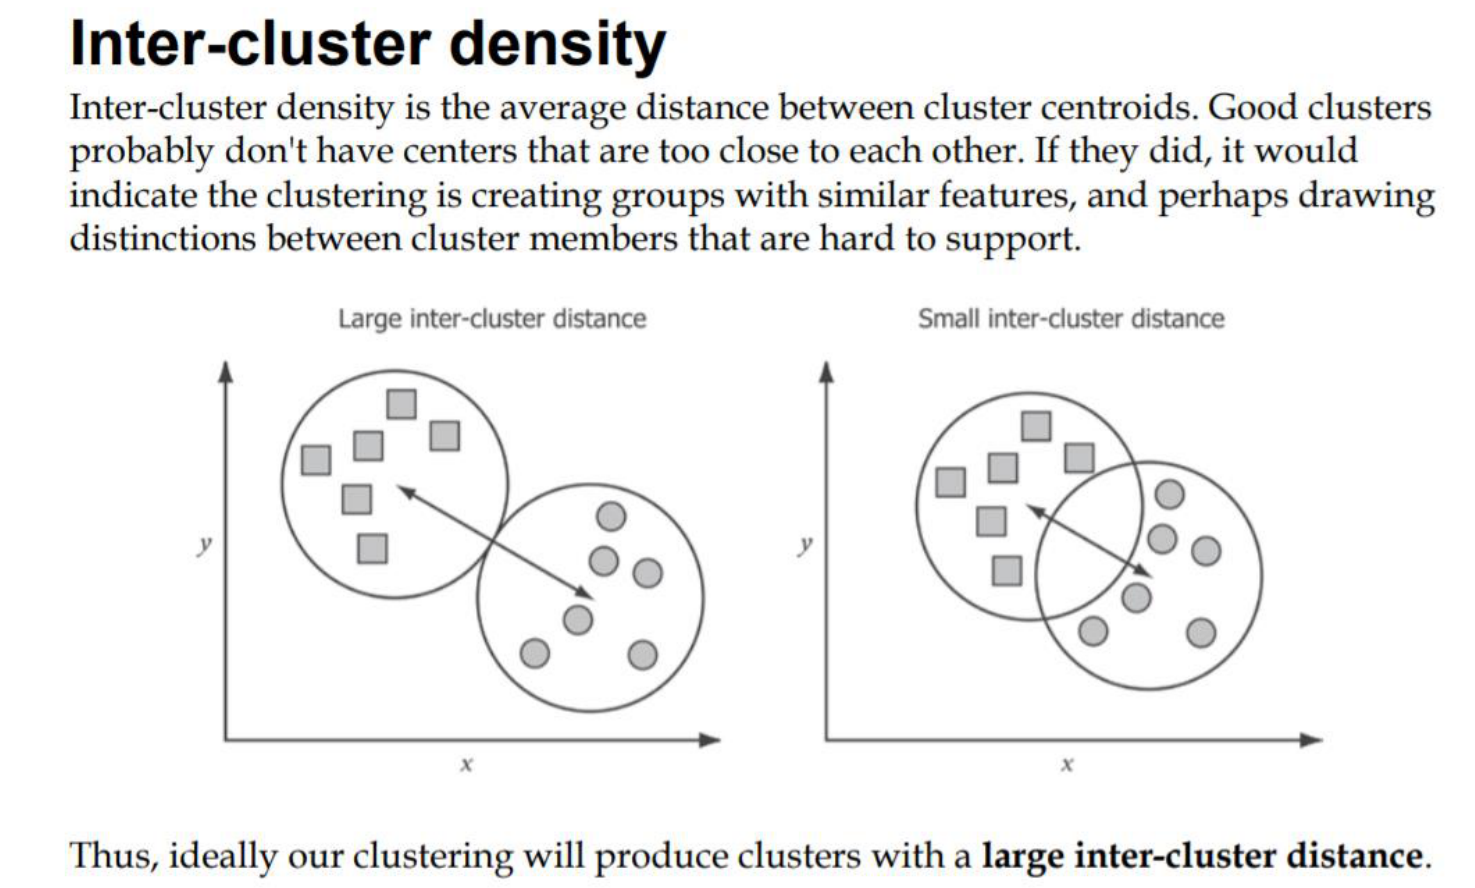

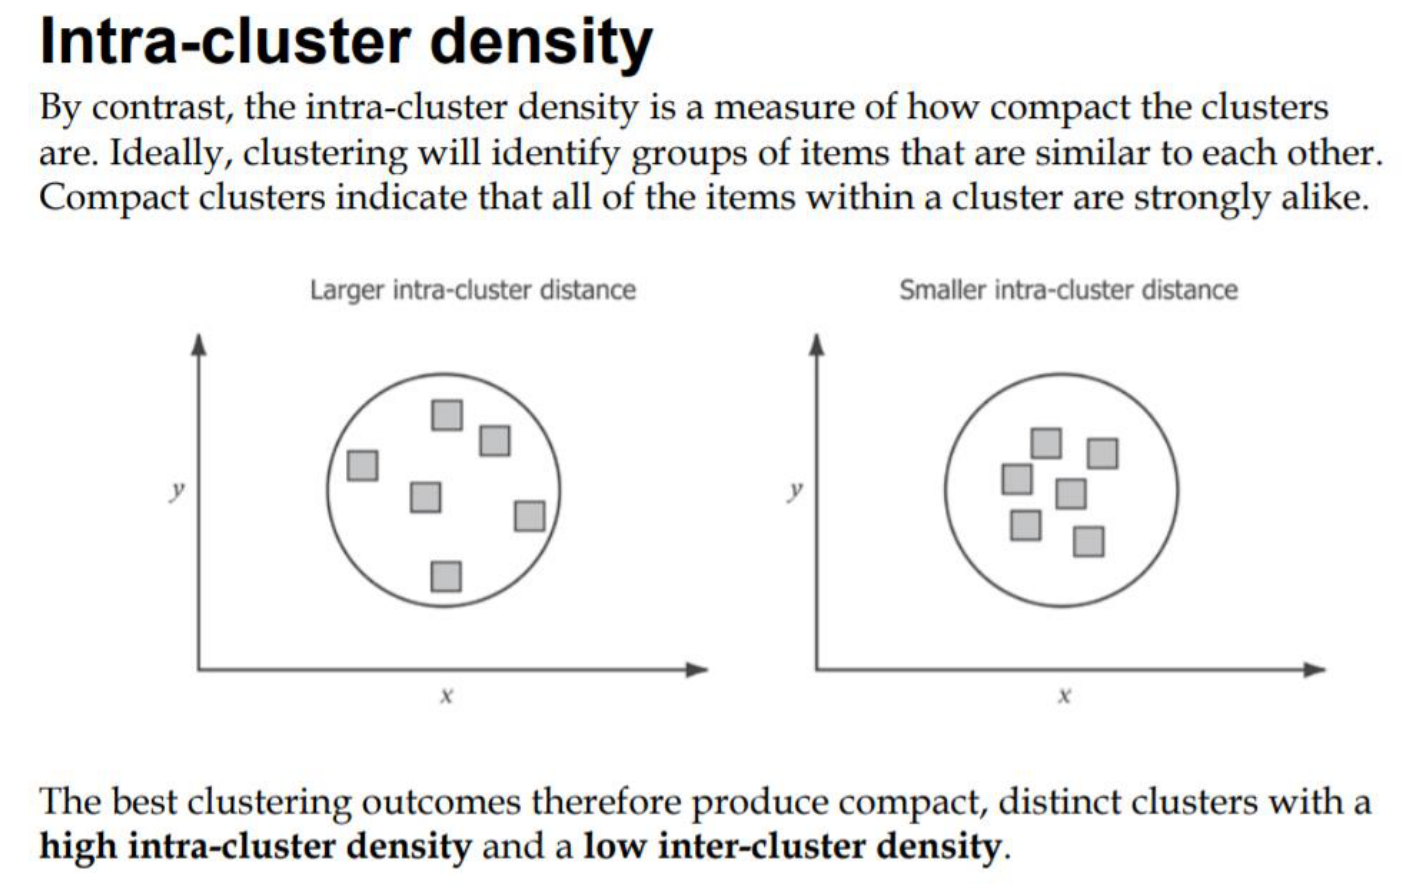

In [21]:
%%sh
# Insert Your Code Here
tail -n 5 ./mahout/output/clusters.txt > ./mahout/output/evaluations.txt

In [22]:
%%sh
# Insert Your Code Here
cat ./mahout/output/evaluations.txt

Inter-Cluster Density: 0.4817408587164046
Intra-Cluster Density: 0.6976913800279259
CDbw Inter-Cluster Density: 0.0
CDbw Intra-Cluster Density: 985.4530988221225
CDbw Separation: 41.332923493525655


In [28]:
# computing mean error (ME), mean sum squared error (MSSE) given a Mahout's cluster dump txt file
def average_cluster_distance(fpath) :
    
    # output clusters centres
    clusters = {}
    
    with open(fpath, 'r') as f : # reading a txt file where the cluster dump is contained
        # iterating through each line in the txt file
        for text in f.readlines() :        
            # cluster metadata are embedded into the line labelled with 'identifier' key
            if "\"identifier\":\"" in text :
                # cluster numerical label
                label = text.split(',')[0].split("\":\"")[-1].replace("\"", '')
                
                # cluster's centroid is labelled with 'c' key
                cn_info = text.split("],\"c\":")[-1] # centroid info + the other info also with [-1] slicing
                
                # initialise cluster metadata 
                clusters[label] = {}
                                
                # number of data points within a cluster is labelled using 'n' key.
                # extract number of data points, i.e. part (at the end) of cn_info 
                # add npoints to the cluster metadata
                clusters[label]['npoints'] = int( cn_info[(cn_info.find("}],\"")+2):].split('\"n\":')[-1].replace('}','') )
                
                # initialise sum distance
                # sum distances between a data point to its centroid
                clusters[label]['sum_distance'] = 0.0

            # distance between a data point and its cluster centre (centroid) is labelled with 'distance' key        
            if '[distance=' in text :
                # extract the distance, square it and then add it to SSE (sum squared error)
                distance = float( text.split(': ')[1].replace('[distance=', '').replace(']', '') )
                clusters[label]['sum_distance'] += distance
                
        
        # overall sum distance between a data point and its centroid
        sum_distance = 0.0
        # total number of data points
        data_points = 0
        for label in clusters.keys() :
            # average distance for a specific cluster, not necessary for the overall computation
            clusters[label]['average_distance'] = clusters[label]['sum_distance'] / clusters[label]['npoints']
            
            sum_distance += clusters[label]['sum_distance']
            data_points += clusters[label]['npoints']
            
        # overall average distance between a data point and its centroid
        average_distance = sum_distance / data_points
        
        return average_distance 

#### Average Distance between a Data Point and its Centroid

In [29]:
cluster_dump_file = "./mahout/output/clusters.txt"

# average distance
average_cluster_distance(cluster_dump_file)

0.8236481794039376

### Canopy Clustering

Canopy clustering is a simple and fast technique used by Mahout for clustering purpose. The objects will be treated as points in a plain space. This technique is often used as an initial step in other clustering techniques such as k-means clustering. You can run a Canopy job using the following syntax:

```shell
mahout canopy -i <input vectors directory>
-o <output directory>
-t1 <threshold value 1>
-t2 <threshold value 2>
```

You can also get help of the utility as shown below:
```shell
mahout canopy --help
```

Canopy job requires an input file directory with the sequence file and an output directory where the clustered data is to be stored.

In our case, we can clustering our documents using Canopy using the command below:

```shell
mahout canopy -i mahout/docs-seqfiles -o mahout/centroids -ow -t1 0.5 -t2 0.3
```
You will get the clustered data generated in the given output directory.


In [ ]:
%%sh
# Insert Your Code Here

In [ ]:
%%sh
# Insert Your Code Here

Next we can evaluate the output clusters similar to what we did before for kMeans.

In [ ]:
%%sh
# Insert Your Code Here

**Note**: We can also use centroids generated by Canopy as an initial centroids for k-Means clustering 

```shell
mahout kmeans -i mahout/docs-vectors/tfidf-vectors -c mahout/centroids -o hdfs://lena/user/${USER}/mahout/output-clusters -dm org.apache.mahout.common.distance.CosineDistanceMeasure -cl -cd 0.1 -ow -x 100 -k 10
```

In this case, <code>mahout/centroids</code> has already been created by Canopy.

<code>t1</code> and <code>t2</code> are the parameters that determines how many clusters Canopy will create. If the number of clusters created by Canopy is higher than the specified <code>k</code>, then the initial centroilds, says <code>k</code> will be randomly taken the set of centroids that Canopy created. 

## Automate K-Means Clustering

If we are to explore how <code>k</code> will impact the cluster quality, then we need to be able to iterate over <code>k</code>s, i.e. loop. For each <code>k</code>, we perform k-Means clustering, cluster analysis and then extract the cluster evaluation.

To understand how looping can be done in <code>shell</code>, let's consider the code snippet below.

In [30]:
%%sh
for i in 1 2 4 8
do
   echo "Welcome ${i} times"
done

Welcome 1 times
Welcome 2 times
Welcome 4 times
Welcome 8 times


Below is the code example of how we can automate k-Means clustering, cluster analysis and extraction of evaluation results.

In [31]:
%%bash
# delete existing cluster evalution results
rm ./mahout/output/evaluations*

# iterate over various k and perform kmeans clustering for a specified k
for k in 4 8 16
do
    echo "k = ${k}"
    
    # k-means clustering for a given k
    mahout kmeans -i mahout/docs-vectors/tfidf-vectors -c mahout/centroids -o hdfs://lena/user/${USER}/mahout/output-clusters -dm org.apache.mahout.common.distance.CosineDistanceMeasure -cl -cd 0.1 -ow -x 100 -k ${k}
    
    # cluster analysis on the final iteration
    hadoop fs -ls mahout/output-clusters | grep final | awk '{print $NF}' | { read -r FINAL_ITERATION; mahout clusterdump -dt sequencefile -d mahout/docs-vectors/dictionary.file-* -i "$FINAL_ITERATION" -o ./mahout/output/clusters.txt -dm org.apache.mahout.common.distance.CosineDistanceMeasure -b 0 -n 0 -p mahout/output-clusters/clusteredPoints --evaluate; }
    
    # extract cluster evaluation
    tail -n 5 ./mahout/output/clusters.txt > ./mahout/output/evaluations-${k}.txt
    
    # extract distances between a data point and its centroid
    # need it for computing overall average distance
    head -n -6 ./mahout/output/clusters.txt > ./mahout/output/distances-${k}.txt
done

k = 4
Running on hadoop, using /opt/hadoop/current/bin/hadoop and HADOOP_CONF_DIR=
MAHOUT-JOB: /opt/mahout/current/mahout-examples-0.13.0-job.jar
Running on hadoop, using /opt/hadoop/current/bin/hadoop and HADOOP_CONF_DIR=
MAHOUT-JOB: /opt/mahout/current/mahout-examples-0.13.0-job.jar
k = 8
Running on hadoop, using /opt/hadoop/current/bin/hadoop and HADOOP_CONF_DIR=
MAHOUT-JOB: /opt/mahout/current/mahout-examples-0.13.0-job.jar
Running on hadoop, using /opt/hadoop/current/bin/hadoop and HADOOP_CONF_DIR=
MAHOUT-JOB: /opt/mahout/current/mahout-examples-0.13.0-job.jar
k = 16
Running on hadoop, using /opt/hadoop/current/bin/hadoop and HADOOP_CONF_DIR=
MAHOUT-JOB: /opt/mahout/current/mahout-examples-0.13.0-job.jar
Running on hadoop, using /opt/hadoop/current/bin/hadoop and HADOOP_CONF_DIR=
MAHOUT-JOB: /opt/mahout/current/mahout-examples-0.13.0-job.jar


23/07/01 07:47:42 INFO AbstractJob: Command line arguments: {--clustering=null, --clusters=[mahout/centroids], --convergenceDelta=[0.1], --distanceMeasure=[org.apache.mahout.common.distance.CosineDistanceMeasure], --endPhase=[2147483647], --input=[mahout/docs-vectors/tfidf-vectors], --maxIter=[100], --method=[mapreduce], --numClusters=[4], --output=[hdfs://lena/user/tsree001/mahout/output-clusters], --overwrite=null, --startPhase=[0], --tempDir=[temp]}
23/07/01 07:47:43 INFO HadoopUtil: Deleting hdfs://lena/user/tsree001/mahout/output-clusters
23/07/01 07:47:43 INFO HadoopUtil: Deleting mahout/centroids
23/07/01 07:47:43 INFO ZlibFactory: Successfully loaded & initialized native-zlib library
23/07/01 07:47:43 INFO CodecPool: Got brand-new compressor [.deflate]
23/07/01 07:47:43 INFO RandomSeedGenerator: Wrote 4 Klusters to mahout/centroids/part-randomSeed
23/07/01 07:47:43 INFO KMeansDriver: Input: mahout/docs-vectors/tfidf-vectors Clusters In: mahout/centroids/part-randomSeed Out: hdf

Verify the evaluations are created for each <code>k</code>.

In [32]:
%%bash
ls ./mahout/output

clusters.txt
distances-16.txt
distances-4.txt
distances-8.txt
evaluations-16.txt
evaluations-4.txt
evaluations-8.txt


Extract the evaluation metrics and colate them into a Pandas dataframe.

In [37]:
import pandas as pd

evaluations = []
for k in [4, 8, 16] :
    eval_fpath = "./mahout/output/evaluations-" + str(k) + ".txt"
    dist_fpath = "./mahout/output/distances-" + str(k) + ".txt"
    
    with open(eval_fpath) as f:
        for line in f.readlines() :
            metric, value = line.split(": ")
            value = float(value.replace("\n", ""))
            evaluations.append([k, metric, value])
            
    # add average distance to the list of evaluation metrics
    evaluations.append([k, "Average Distance", average_cluster_distance(dist_fpath)])
            
evaluations = pd.DataFrame(data=evaluations, columns=["k", "metric", "value"])

evaluations.head(12)

,k,metric,value
0,4,Inter-Cluster Density,0.580814
1,4,Intra-Cluster Density,0.668041
2,4,CDbw Inter-Cluster Density,0.000000
3,4,CDbw Intra-Cluster Density,1051.968296
4,4,CDbw Separation,0.144589
5,4,Average Distance,0.838449
6,8,Inter-Cluster Density,0.518141
7,8,Intra-Cluster Density,0.667527
8,8,CDbw Inter-Cluster Density,0.000000
9,8,CDbw Intra-Cluster Density,1036.439119
